In [1]:
#Import libs, read dataset, drop unusefull columns (occasionally occured during parsing of data)
import pandas as pd
import numpy as np
import datetime as dt
PATH = r'C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\data\q4_2017.xlsx'
columns=['Sp_nummer', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order', 'Billing']
df = pd.read_excel(PATH, index_col=None, header=1)
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [2]:
df.head()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
0,Product_19,201813,13,201752,176316,NaN
1,Product_20,201813,13,201752,516510,NaN
2,Product_22,201813,13,201752,237587,NaN
3,Product_30,201813,13,201752,393741,NaN
4,Product_39,201813,13,201752,92112,NaN


In [3]:
df['Billing'].loc[df['Billing'].isna()] = 0
df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0
df.head()

<ipython-input-3-9df1214224e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Billing'].loc[df['Billing'].isna()] = 0
<ipython-input-3-9df1214224e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0


,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
0,Product_19,201813,13,201752,176316,0.0
1,Product_20,201813,13,201752,516510,0.0
2,Product_22,201813,13,201752,237587,0.0
3,Product_30,201813,13,201752,393741,0.0
4,Product_39,201813,13,201752,92112,0.0


In [4]:
products = df['Sp_number'].unique()
prod2idx = {}
idx2prod = {}
for idx, prod in enumerate(products):
    if prod not in prod2idx:
        prod2idx[prod] = idx
        idx2prod[idx] = prod
        
#Add column with integer product names

products_int = []
for idx, row in df['Sp_number'].iteritems():
    products_int.append(prod2idx[row])
    
df['products'] = products_int

In [5]:
df.head()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing,products
0,Product_19,201813,13,201752,176316,0.0,0
1,Product_20,201813,13,201752,516510,0.0,1
2,Product_22,201813,13,201752,237587,0.0,2
3,Product_30,201813,13,201752,393741,0.0,3
4,Product_39,201813,13,201752,92112,0.0,4


In [6]:
mapper = {
    'products': 'product',
    'Fc_horizon': 'horizon',
    'Fc_and_order': 'forecast',
    'Billing': 'billing',
    "Due_date": "ddate",
    "Fc_date": "fdate"
}
df.rename(columns=mapper, inplace=True)

In [7]:
df['isodate'] = df[['ddate']].apply(lambda x: dt.datetime.strptime(str(x['ddate'])+'-1',"%Y%W-%w"), axis=1)

In [8]:
df.head()

,Sp_number,ddate,horizon,fdate,forecast,billing,product,isodate
0,Product_19,201813,13,201752,176316,0.0,0,2018-03-26
1,Product_20,201813,13,201752,516510,0.0,1,2018-03-26
2,Product_22,201813,13,201752,237587,0.0,2,2018-03-26
3,Product_30,201813,13,201752,393741,0.0,3,2018-03-26
4,Product_39,201813,13,201752,92112,0.0,4,2018-03-26


In [85]:
df_=df[['product', 'billing', 'forecast', 'horizon', 'isodate']].copy()

In [86]:
df_.head()

,product,billing,forecast,horizon,isodate
0,0,0.0,176316,13,2018-03-26
1,1,0.0,516510,13,2018-03-26
2,2,0.0,237587,13,2018-03-26
3,3,0.0,393741,13,2018-03-26
4,4,0.0,92112,13,2018-03-26


In [87]:
df_dh = df_.groupby(['isodate', 'horizon'], as_index=False).sum()

In [88]:
idxs = df_dh.loc[df_dh['billing'] == 0].index
df_dh.drop(idxs, inplace=True)
df_dh

,isodate,horizon,product,billing,forecast
0,2014-01-06,1,42,3019500.0,2538729
1,2014-01-06,2,42,3019500.0,2495328
2,2014-01-06,3,42,3019500.0,2537265
3,2014-01-06,4,42,3019500.0,2707542
4,2014-01-06,5,42,3019500.0,2769705
...,...,...,...,...,...
2618,2017-12-25,9,45,6360000.0,5376711
2619,2017-12-25,10,45,6360000.0,5228707
2620,2017-12-25,11,45,6360000.0,5294063
2621,2017-12-25,12,45,6360000.0,5801415


In [89]:
df_dh['error'] = df_dh['billing'] - df_dh['forecast']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158F103ED88>]],
      dtype=object)

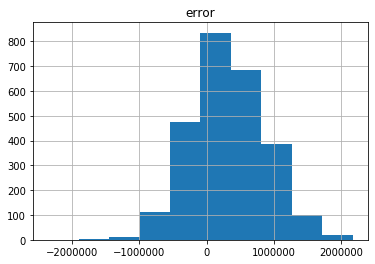

In [90]:
df_dh.hist(column=['error'])

In [91]:
df_dh[['error']].describe()

,error
count,2.623000e+03
mean,3.211926e+05
std,5.547832e+05
min,-2.354592e+06
25%,-6.129900e+04
50%,2.791440e+05
75%,6.979490e+05
max,2.172615e+06


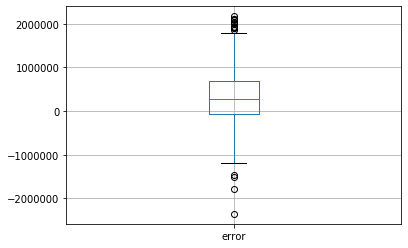

In [92]:
df_dh.boxplot(column=['error'])

In [9]:
def calculate_interquartal_range(df, col:str, k=1.5):
    '''
    Args: dataframe and columnname for pandas.DataFrame.describe(); k defines the distance multiplicator (equals 1,5 by default)
    Return: tulpe interprets as a range [the lowest possible value; the highest possible value] for not being outlier in this dataset
    '''
    statistics = df[col].describe()
    Q3 = statistics['75%']
    Q1 = statistics['25%']
    return (Q1-k*(Q3-Q1), Q3+k*(Q3-Q1))

def detect_outliers(df, col):
    '''
    Args: dataframe and columnname where you want to find outliers;
    Return: array of indexes of outliers
    '''
    iq_range = calculate_interquartal_range(df, col)
    idxs = []
    idxs.extend(df.loc[df[col]<iq_range[0]].index)
    idxs.extend(df.loc[df[col]>iq_range[1]].index)
    return idxs

In [108]:
outliersidx = detect_outliers(df_dh, "error")

In [109]:
df_dh.iloc[outliersidx]

,isodate,horizon,product,billing,forecast,error
2228,2017-05-22,6,45,5492500.0,6965027,-1472527.0
2256,2017-06-05,8,45,6569193.0,8080027,-1510834.0
2298,2017-06-26,11,45,4610500.0,6965092,-2354592.0
2312,2017-07-03,12,45,6043155.0,7829925,-1786770.0
1674,2016-07-25,1,45,6725000.0,4631896,2093104.0
1675,2016-07-25,2,45,6725000.0,4626783,2098217.0
1677,2016-07-25,5,45,6725000.0,4797132,1927868.0
1680,2016-07-25,8,45,6725000.0,4871858,1853142.0
1681,2016-07-25,9,45,6725000.0,4793489,1931511.0
1682,2016-07-25,10,45,6725000.0,4552385,2172615.0


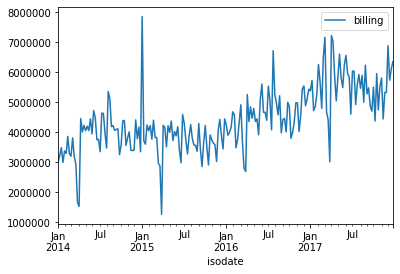

In [98]:
df_dh.drop_duplicates(subset=['isodate']).plot(x='isodate',y='billing')

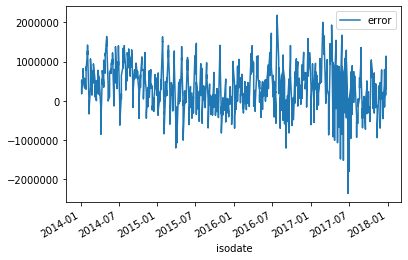

In [103]:
df_dh.drop_duplicates(subset=['horizon','isodate']).plot(x='isodate',y='error')

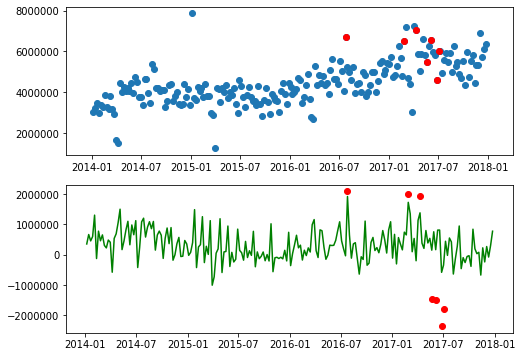

In [140]:
# plot billings to date 
# plot mean forecast error to date
# highlight an outliers in the forecast error

from matplotlib import pyplot as plt

fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,6)

df1 = df_dh.drop_duplicates(subset=['isodate'])
x1 = df1['isodate'].values
y1 = df1['billing'].values

ax[0].scatter(x1,y1)

df2 = df_dh.groupby(['isodate'], as_index=False).mean()
x2 = df2['isodate'].values
y2 = df2['error'].values
ax[1].plot(x1,y2, color='green')

for idx, row in df_dh.iloc[outliersidx].drop_duplicates(subset=['isodate']).iterrows():
    x = row['isodate']
    y = row['billing']
    y_ = row['error']
    ax[0].plot(x,y,marker="o", color="red")
    ax[1].plot(x,y_,marker="o", color="red")

plt.show()

In [135]:
df_dh.iloc[:13].mean()

horizon     7.000000e+00
product     4.200000e+01
billing     3.019500e+06
forecast    2.665010e+06
error       3.544901e+05
dtype: float64

In [159]:
df_dh

,isodate,horizon,product,billing,forecast,error
0,2014-01-06,1,42,3019500.0,2538729,480771.0
1,2014-01-06,2,42,3019500.0,2495328,524172.0
2,2014-01-06,3,42,3019500.0,2537265,482235.0
3,2014-01-06,4,42,3019500.0,2707542,311958.0
4,2014-01-06,5,42,3019500.0,2769705,249795.0
...,...,...,...,...,...,...
2618,2017-12-25,9,45,6360000.0,5376711,983289.0
2619,2017-12-25,10,45,6360000.0,5228707,1131293.0
2620,2017-12-25,11,45,6360000.0,5294063,1065937.0
2621,2017-12-25,12,45,6360000.0,5801415,558585.0


In [144]:
# remove outliers

df_dh_ = df_dh.drop(outliersidx)

In [161]:
df_dh_[['error']].describe()

,error
count,2.606000e+03
mean,3.160499e+05
std,5.373031e+05
min,-1.199049e+06
25%,-6.184350e+04
50%,2.767805e+05
75%,6.911452e+05
max,1.792050e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158F5787F48>]],
      dtype=object)

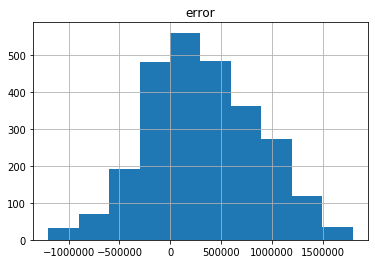

In [164]:
df_dh_[['error']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158F5E59548>]],
      dtype=object)

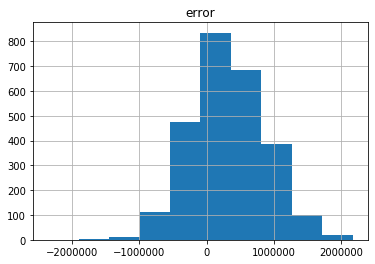

In [165]:
df_dh[['error']].hist()

In [162]:
df_dh[['error']].describe()

,error
count,2.623000e+03
mean,3.211926e+05
std,5.547832e+05
min,-2.354592e+06
25%,-6.129900e+04
50%,2.791440e+05
75%,6.979490e+05
max,2.172615e+06


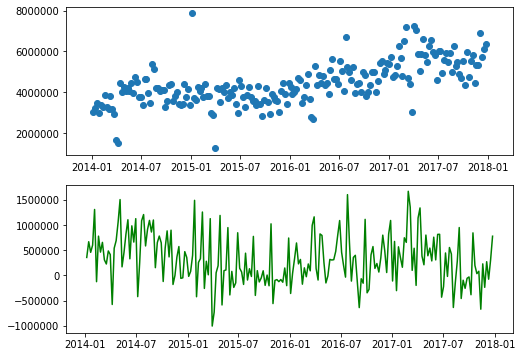

In [146]:

# plot billings to date 
# plot mean forecast error to date
# highlight an outliers in the forecast error

from matplotlib import pyplot as plt

fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,6)

df1 = df_dh_.drop_duplicates(subset=['isodate'])
x1 = df1['isodate'].values
y1 = df1['billing'].values

ax[0].scatter(x1,y1)

df2 = df_dh_.groupby(['isodate'], as_index=False).mean()
x2 = df2['isodate'].values
y2 = df2['error'].values
ax[1].plot(x1,y2, color='green')

# for idx, row in df_dh_.iloc[outliersidx].drop_duplicates(subset=['isodate']).iterrows():
#     x = row['isodate']
#     y = row['billing']
#     y_ = row['error']
#     ax[0].plot(x,y,marker="o", color="red")
#     ax[1].plot(x,y_,marker="o", color="red")

plt.show()

In [147]:
df_dh_.groupby(['isodate'], as_index=False).mean()

,isodate,horizon,product,billing,forecast,error
0,2014-01-06,7.000000,42.000000,3.019500e+06,2.665010e+06,3.544901e+05
1,2014-01-13,7.000000,42.000000,3.214497e+06,2.548243e+06,6.662542e+05
2,2014-01-20,7.000000,42.230769,3.145654e+06,2.689802e+06,4.558519e+05
3,2014-01-27,7.000000,42.461538,2.733462e+06,2.134210e+06,5.992518e+05
4,2014-02-03,7.000000,42.692308,3.122731e+06,1.816858e+06,1.305873e+06
...,...,...,...,...,...,...
203,2017-11-27,7.000000,45.000000,5.334000e+06,5.572135e+06,-2.381351e+05
204,2017-12-04,7.000000,45.000000,6.894500e+06,6.624452e+06,2.700479e+05
205,2017-12-11,7.500000,45.000000,5.742000e+06,5.819028e+06,-7.702817e+04
206,2017-12-18,7.416667,45.000000,6.112500e+06,5.806014e+06,3.064856e+05


In [157]:
df_dh_.groupby(['isodate'], as_index=False).mean()[["error"]] == df_dh.groupby(['isodate'], as_index=False).mean()[["error"]]

,error
0,True
1,True
2,True
3,True
4,True
...,...
203,True
204,True
205,True
206,True


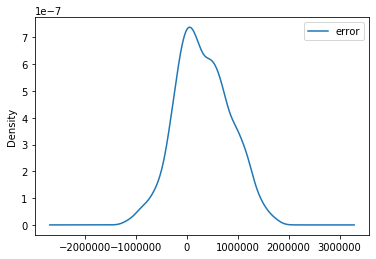

In [170]:
df_dh_[['error']].plot.density()

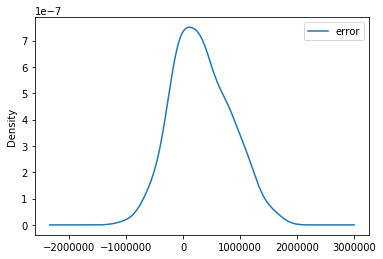

In [174]:
df_dh_.groupby(['isodate']).mean()[['error']].plot.density()

In [192]:
from scipy.stats import shapiro
data_ = df_dh_.groupby(['isodate'], as_index=False).mean()
data = data_['error'].values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.118
Sample looks Gaussian (fail to reject H0)


In [200]:
from scipy.stats import anderson
data_ = df_dh_.groupby(['isodate'], as_index=False).mean()
data = data_['error'].values
result = anderson(data)
print('Statistics=%.3f' % (result.statistic))
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistics=0.845
15.000: 0.565, data does not look normal (reject H0)
10.000: 0.644, data does not look normal (reject H0)
5.000: 0.773, data does not look normal (reject H0)
2.500: 0.901, data looks normal (fail to reject H0)
1.000: 1.072, data looks normal (fail to reject H0)


In [201]:
from scipy.stats import normaltest
data_ = df_dh_.groupby(['isodate'], as_index=False).mean()
data = data_['error'].values
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=3.191, p=0.203
Sample looks Gaussian (fail to reject H0)


# Test CNN-LSTM
CNN Long Short-Term Memory Network

In [33]:
df_ = df[['product', 'billing', 'isodate']].loc[df['horizon']==1].copy()
df_.drop(df_.loc[df_['billing'] == 0].index, inplace=True)
df_g = df_.groupby(['isodate'], as_index=False).sum()

In [34]:
df_

,product,billing,isodate
821,0,301000.0,2017-12-25
833,1,904000.0,2017-12-25
845,2,210000.0,2017-12-25
857,3,357500.0,2017-12-25
869,4,157500.0,2017-12-25
...,...,...,...
27011,5,747500.0,2014-01-06
27024,6,92500.0,2014-01-06
27037,7,207500.0,2014-01-06
27050,8,210000.0,2014-01-06


In [228]:
df_g.mean()

product    4.515423e+01
billing    4.437784e+06
dtype: float64

In [229]:
df_g.loc[df_g['product'] != 45]

,isodate,product,billing
0,2014-01-06,42,3019500.0
1,2014-01-13,42,3214497.0
51,2015-01-05,90,7861000.0
113,2016-03-28,37,2697000.0


In [218]:
df_g.drop(df_g.loc[df_g['product'] != 45].index, inplace=True)

In [230]:
df_g[['product']].loc[df_g['product'] != 45] = df_g['product'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [232]:
df_g.mean()

product    4.515423e+01
billing    4.437784e+06
dtype: float64

# 04-05-22

In [37]:
df

,Sp_number,ddate,horizon,fdate,forecast,billing,product,isodate,error
810,Product_19,201752,13,201739,196910,301000.0,0,2017-12-25,104090.0
811,Product_19,201752,12,201740,171074,301000.0,0,2017-12-25,129926.0
812,Product_19,201752,11,201741,167090,301000.0,0,2017-12-25,133910.0
813,Product_19,201752,10,201742,178101,301000.0,0,2017-12-25,122899.0
814,Product_19,201752,9,201743,178765,301000.0,0,2017-12-25,122235.0
...,...,...,...,...,...,...,...,...,...
27059,Product_67,201401,5,201348,543052,530000.0,9,2014-01-06,-13052.0
27060,Product_67,201401,4,201349,563778,530000.0,9,2014-01-06,-33778.0
27061,Product_67,201401,3,201350,503575,530000.0,9,2014-01-06,26425.0
27062,Product_67,201401,2,201351,489937,530000.0,9,2014-01-06,40063.0


In [11]:
df['error'] = df.billing-df.forecast

In [36]:
df.drop(df.loc[df['billing']==0].index, inplace=True)

In [38]:
df1 = df.loc[df['product'] == 1].copy()

In [39]:
df1

,Sp_number,ddate,horizon,fdate,forecast,billing,product,isodate,error
822,Product_20,201752,13,201739,690311,904000.0,1,2017-12-25,213689.0
823,Product_20,201752,12,201740,615345,904000.0,1,2017-12-25,288655.0
824,Product_20,201752,11,201741,615517,904000.0,1,2017-12-25,288483.0
825,Product_20,201752,10,201742,601979,904000.0,1,2017-12-25,302021.0
826,Product_20,201752,9,201743,604032,904000.0,1,2017-12-25,299968.0
...,...,...,...,...,...,...,...,...,...
26968,Product_20,201401,5,201348,654476,628000.0,1,2014-01-06,-26476.0
26969,Product_20,201401,4,201349,552284,628000.0,1,2014-01-06,75716.0
26970,Product_20,201401,3,201350,543829,628000.0,1,2014-01-06,84171.0
26971,Product_20,201401,2,201351,545530,628000.0,1,2014-01-06,82470.0


In [14]:
df1.horizon.unique()

array([13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  2,  1,  3], dtype=int64)

In [15]:
hors = df1.horizon.unique()
dates = df1.isodate.unique()
data = {}

for date in dates:
    for h in hors:
        val = df1.error.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
        if not val:
            val = [0]
        if h not in data:
            data[h] = []
        data[h].append(val[0])

In [40]:
data

{13: [213689.0,
  -29616.0,
  99644.0,
  108171.0,
  50945.0,
  361152.0,
  -33033.0,
  71286.0,
  -195071.0,
  178994.0,
  0,
  215206.0,
  -120320.0,
  281627.0,
  211994.0,
  113621.0,
  198983.0,
  -241957.0,
  -3651.0,
  98336.0,
  7609.0,
  -61432.0,
  441093.0,
  288047.0,
  39723.0,
  -144688.0,
  14032.0,
  642218.0,
  243487.0,
  281512.0,
  -246168.0,
  174512.0,
  43588.0,
  75000.0,
  -5707.0,
  417155.0,
  178142.0,
  599286.0,
  204470.0,
  -152024.0,
  128300.0,
  80740.0,
  701311.0,
  168062.0,
  151147.0,
  395862.0,
  313517.0,
  -35286.0,
  311387.0,
  147037.0,
  728017.0,
  -135563.0,
  101665.0,
  355057.0,
  -61283.0,
  283721.0,
  108056.0,
  379591.0,
  -51654.0,
  347309.0,
  -175499.0,
  142352.0,
  193245.0,
  151744.0,
  203142.0,
  0,
  52275.0,
  47067.0,
  191628.0,
  -94096.0,
  198646.0,
  182614.0,
  73502.0,
  -31413.0,
  537565.0,
  197579.0,
  175967.0,
  0,
  -209942.0,
  -40420.0,
  105746.0,
  151894.0,
  -130197.0,
  -16345.0,
  149191.0,
  6

In [41]:
df_ = pd.DataFrame(data, columns=data.keys(), index=dates)

In [42]:
df_[df_ == 0].count()

13    6
12    6
11    6
10    6
9     6
8     6
7     6
6     6
5     6
4     6
2     7
1     7
3     7
dtype: int64

In [43]:
df_.mean()

13    67216.812500
12    58440.875000
11    59276.552885
10    54457.908654
9     51893.379808
8     49611.394231
7      7059.110577
6     18724.682692
5     29049.682692
4     36210.826923
2     51475.274038
1     68436.206731
3     50475.908654
dtype: float64

In [44]:
df_[df_ == 0]

,13,12,11,10,9,8,7,6,5,4,2,1,3
2017-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2017-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2017-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_r = df_.replace(0, df_.T.mean().mean())

In [46]:
df_r.mean()

13    68553.340493
12    59777.402993
11    60613.080877
10    55794.436647
9     53229.907800
8     50947.922223
7      8395.638570
6     20061.210685
5     30386.210685
4     37547.354916
2     53034.556697
1     69995.489389
3     52035.191312
dtype: float64

<ipython-input-23-29b6cc9bf8c1>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_['2017':].plot()


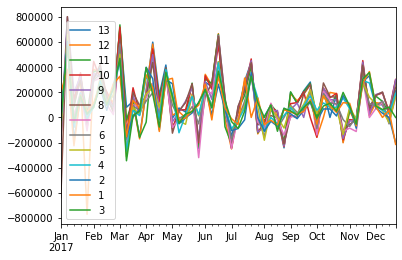

In [23]:
df_['2017':].plot()

<ipython-input-49-9d99d0c97544>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_r['2017':][3].plot()


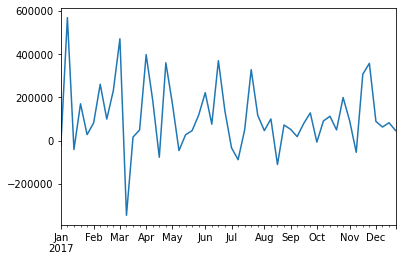

In [49]:
df_r['2017':][3].plot()

## To do:
- remove outliers

## State:
- df_r contains 13 forecast errors for the whole period for product 1
- Idea: forecast the next error

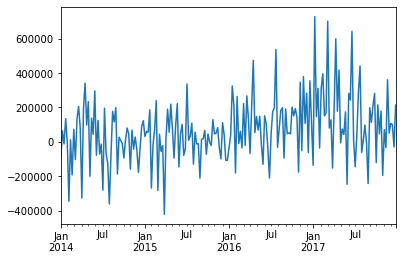

In [27]:
df_r[13].plot()

 ### Feature generations
 - Time Series Feature: catch 22 canonical set
 -  

In [50]:
df_r

,13,12,11,10,9,8,7,6,5,4,2,1,3
2017-12-25,213689.0,288655.0,288483.0,302021.0,299968.0,240220.0,158685.0,192673.0,169893.0,191398.0,-200661.000000,-214633.000000,46332.970414
2017-12-18,-29616.0,-26745.0,39007.0,49224.0,26799.0,36743.0,-41522.0,-51612.0,-41925.0,30489.0,46332.970414,57092.000000,82744.000000
2017-12-11,99644.0,110922.0,127690.0,194475.0,199358.0,202481.0,117970.0,129959.0,56168.0,57490.0,33471.000000,46332.970414,62954.000000
2017-12-04,108171.0,117471.0,168831.0,177313.0,182394.0,175845.0,71804.0,92493.0,105697.0,85232.0,74820.000000,84636.000000,88653.000000
2017-11-27,50945.0,14180.0,58980.0,40015.0,21750.0,81025.0,-723.0,110987.0,161805.0,274880.0,332381.000000,365009.000000,356926.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-03,-3249.0,-10281.0,53693.0,62180.0,18161.0,34092.0,38641.0,39322.0,17644.0,9073.0,58793.000000,17562.000000,22574.000000
2014-01-27,135082.0,168281.0,139024.0,156484.0,128569.0,134741.0,80796.0,58645.0,66590.0,40639.0,66711.000000,18650.000000,31986.000000
2014-01-20,-11793.0,-11362.0,-23644.0,-80716.0,-93874.0,-88743.0,110538.0,141255.0,166851.0,166232.0,158901.000000,28757.000000,182247.000000
2014-01-13,64756.0,77290.0,111760.0,104403.0,160958.0,129139.0,86956.0,67705.0,62793.0,72691.0,89215.000000,107028.000000,80290.000000


In [52]:
### Setup CNN

,Sp_number,ddate,horizon,fdate,forecast,billing,product,isodate,error
810,Product_19,201752,13,201739,196910,301000.0,0,2017-12-25,104090.0
811,Product_19,201752,12,201740,171074,301000.0,0,2017-12-25,129926.0
812,Product_19,201752,11,201741,167090,301000.0,0,2017-12-25,133910.0
813,Product_19,201752,10,201742,178101,301000.0,0,2017-12-25,122899.0
814,Product_19,201752,9,201743,178765,301000.0,0,2017-12-25,122235.0
...,...,...,...,...,...,...,...,...,...
27059,Product_67,201401,5,201348,543052,530000.0,9,2014-01-06,-13052.0
27060,Product_67,201401,4,201349,563778,530000.0,9,2014-01-06,-33778.0
27061,Product_67,201401,3,201350,503575,530000.0,9,2014-01-06,26425.0
27062,Product_67,201401,2,201351,489937,530000.0,9,2014-01-06,40063.0


# Test CNN 11-05-22

In [54]:
input_df = df_r.copy()

In [67]:
output_df = df[['isodate','billing']].loc[df['product'] == 1].drop_duplicates(['isodate']).copy()

In [71]:
output_df.set_index(['isodate'], inplace=True)

In [77]:
output_df.head()

,billing
isodate,
2017-12-25,904000.0
2017-12-18,996000.0
2017-12-11,652000.0
2017-12-04,716000.0
2017-11-27,960000.0


In [78]:
input_df.head()

,13,12,11,10,9,8,7,6,5,4,2,1,3
2017-12-25,213689.0,288655.0,288483.0,302021.0,299968.0,240220.0,158685.0,192673.0,169893.0,191398.0,-200661.000000,-214633.000000,46332.970414
2017-12-18,-29616.0,-26745.0,39007.0,49224.0,26799.0,36743.0,-41522.0,-51612.0,-41925.0,30489.0,46332.970414,57092.000000,82744.000000
2017-12-11,99644.0,110922.0,127690.0,194475.0,199358.0,202481.0,117970.0,129959.0,56168.0,57490.0,33471.000000,46332.970414,62954.000000
2017-12-04,108171.0,117471.0,168831.0,177313.0,182394.0,175845.0,71804.0,92493.0,105697.0,85232.0,74820.000000,84636.000000,88653.000000
2017-11-27,50945.0,14180.0,58980.0,40015.0,21750.0,81025.0,-723.0,110987.0,161805.0,274880.0,332381.000000,365009.000000,356926.000000


In [82]:
input_val = input_df.values
output_val = output_df.values

In [107]:
# split a univariate sequence into samples

def split_sequence(seq, n_steps):
    X, y = [], []
    for i in range(len(seq)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(seq)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = seq[i:end_ix], seq[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [85]:
import numpy as np

X,y = split_sequence(input_val, 10)
for i in range(len(X)):
    print(X[i],y[i])

[[ 213689.         288655.         288483.         302021.
   299968.         240220.         158685.         192673.
   169893.         191398.        -200661.        -214633.
    46332.9704142]
 [ -29616.         -26745.          39007.          49224.
    26799.          36743.         -41522.         -51612.
   -41925.          30489.          46332.9704142   57092.
    82744.       ]
 [  99644.         110922.         127690.         194475.
   199358.         202481.         117970.         129959.
    56168.          57490.          33471.          46332.9704142
    62954.       ]
 [ 108171.         117471.         168831.         177313.
   182394.         175845.          71804.          92493.
   105697.          85232.          74820.          84636.
    88653.       ]
 [  50945.          14180.          58980.          40015.
    21750.          81025.           -723.         110987.
   161805.         274880.         332381.         365009.
   356926.       ]
 [ 361152.   

   -67687.       ]] [ 27246.         70922.         51500.         74881.
  64094.         17550.         46332.9704142 -19741.
  -3887.         73853.         53197.        109385.
   9604.       ]
[[ -42352.        -125582.        -120174.        -173990.
  -125065.        -128733.        -162297.        -193074.
  -217260.        -176826.         -90787.         -62971.
  -151145.       ]
 [  68235.         124242.          22613.          17587.
   -13930.         -17254.         -77537.         -76688.
   -63201.         -87195.           5074.          28036.
   -47571.       ]
 [-158686.        -137771.         -53762.        -155094.
  -166054.        -148939.        -160526.        -105791.
   -70293.         -21735.         125285.          58294.
    60432.       ]
 [  46332.9704142 -177776.        -174298.        -143043.
  -152017.        -155972.        -178055.        -168857.
   -30494.         -29651.         -22510.           8247.
   -55888.       ]
 [  80784.       

In [86]:
input_df['billing'] = output_df['billing']

In [87]:
input_df

,13,12,11,10,9,8,7,6,5,4,2,1,3,billing
2017-12-25,213689.0,288655.0,288483.0,302021.0,299968.0,240220.0,158685.0,192673.0,169893.0,191398.0,-200661.000000,-214633.000000,46332.970414,904000.0
2017-12-18,-29616.0,-26745.0,39007.0,49224.0,26799.0,36743.0,-41522.0,-51612.0,-41925.0,30489.0,46332.970414,57092.000000,82744.000000,996000.0
2017-12-11,99644.0,110922.0,127690.0,194475.0,199358.0,202481.0,117970.0,129959.0,56168.0,57490.0,33471.000000,46332.970414,62954.000000,652000.0
2017-12-04,108171.0,117471.0,168831.0,177313.0,182394.0,175845.0,71804.0,92493.0,105697.0,85232.0,74820.000000,84636.000000,88653.000000,716000.0
2017-11-27,50945.0,14180.0,58980.0,40015.0,21750.0,81025.0,-723.0,110987.0,161805.0,274880.0,332381.000000,365009.000000,356926.000000,960000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-03,-3249.0,-10281.0,53693.0,62180.0,18161.0,34092.0,38641.0,39322.0,17644.0,9073.0,58793.000000,17562.000000,22574.000000,432000.0
2014-01-27,135082.0,168281.0,139024.0,156484.0,128569.0,134741.0,80796.0,58645.0,66590.0,40639.0,66711.000000,18650.000000,31986.000000,568000.0
2014-01-20,-11793.0,-11362.0,-23644.0,-80716.0,-93874.0,-88743.0,110538.0,141255.0,166851.0,166232.0,158901.000000,28757.000000,182247.000000,788000.0
2014-01-13,64756.0,77290.0,111760.0,104403.0,160958.0,129139.0,86956.0,67705.0,62793.0,72691.0,89215.000000,107028.000000,80290.000000,752000.0


### Univariate
- only billing column
- product == 1

In [89]:
univ_df = df[['isodate', 'billing']].loc[df['product'] == 1].drop_duplicates(['isodate'])

In [91]:
univ_df.set_index(['isodate'], inplace=True)
univ = univ_df.billing.values

In [93]:
univ

array([ 904000.,  996000.,  652000.,  716000.,  960000.,  960000.,
        536000.,  580000.,  756000.,  572000., 1120000.,  824000.,
        692000.,  668000.,  832000.,  840000.,  800000.,  532000.,
        516000.,  912000.,  672000.,  752000.,  896000.,  960000.,
        736000.,  736000.,  740000., 1108000.,  700000., 1112000.,
        744000., 1012000.,  516000.,  636000.,  860000.,  832000.,
        748000., 1120000., 1000000.,  324000.,  540000.,  532000.,
       1408000.,  696000.,  600000.,  888000., 1208000.,  588000.,
        684000.,  572000., 1240000.,  708000.,  692000.,  756000.,
        516000.,  716000.,  892000.,  676000.,  420000.,  852000.,
        436000.,  456000.,  524000.,  692000.,  892000.,  620000.,
        512000.,  456000.,  780000.,  532000.,  648000.,  696000.,
        728000.,  752000.,  896000.,  584000.,  704000.,  940000.,
        332000.,  500000.,  500000., 1044000.,  616000.,  364000.,
        560000.,  764000.,  840000.,  484000.,  744000.,  8160

In [108]:
X,y = split_sequence(univ, 3)
for i in range(len(X)):
    print(X[i],y[i])

[904000. 996000. 652000.] 716000.0
[996000. 652000. 716000.] 960000.0
[652000. 716000. 960000.] 960000.0
[716000. 960000. 960000.] 536000.0
[960000. 960000. 536000.] 580000.0
[960000. 536000. 580000.] 756000.0
[536000. 580000. 756000.] 572000.0
[580000. 756000. 572000.] 1120000.0
[ 756000.  572000. 1120000.] 824000.0
[ 572000. 1120000.  824000.] 692000.0
[1120000.  824000.  692000.] 668000.0
[824000. 692000. 668000.] 832000.0
[692000. 668000. 832000.] 840000.0
[668000. 832000. 840000.] 800000.0
[832000. 840000. 800000.] 532000.0
[840000. 800000. 532000.] 516000.0
[800000. 532000. 516000.] 912000.0
[532000. 516000. 912000.] 672000.0
[516000. 912000. 672000.] 752000.0
[912000. 672000. 752000.] 896000.0
[672000. 752000. 896000.] 960000.0
[752000. 896000. 960000.] 736000.0
[896000. 960000. 736000.] 736000.0
[960000. 736000. 736000.] 740000.0
[736000. 736000. 740000.] 1108000.0
[ 736000.  740000. 1108000.] 700000.0
[ 740000. 1108000.  700000.] 1112000.0
[1108000.  700000. 1112000.] 744000.0

In [100]:
n_steps = 3

In [102]:
n_features = 1

In [97]:
import tensorflow as tf

model = tf.keras.models.Sequential()

In [103]:
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [109]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [112]:
X.shape

(205, 3, 1)

In [113]:
model.fit(X,y, epochs=1000, verbose=0)

In [114]:
input_x = np.array([625000, 401000, 390000])
input_x = input_x.reshape((1, n_steps, n_features))

In [116]:
yhat = model.predict(input_x, verbose=0)

In [117]:
yhat

array([[507437.1]], dtype=float32)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(univ)

ValueError: not enough values to unpack (expected 4, got 2)

## Multi variante
- forecast horizon
- billing
- product == 1

In [133]:
billingsdf = df[['isodate', 'billing']].loc[df['product'] == 1].drop_duplicates(['isodate'])
billingsdf.set_index(['isodate'], inplace=True)
billingsdf.head()

,billing
isodate,
2017-12-25,904000.0
2017-12-18,996000.0
2017-12-11,652000.0
2017-12-04,716000.0
2017-11-27,960000.0


In [148]:
billingsdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208 entries, 2017-12-25 to 2014-01-06
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   billing  208 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [125]:
fcdf = df[['isodate','forecast', 'horizon']].loc[df['product'] == 1]
fcdf.set_index(['isodate'], inplace=True)

In [139]:
fcdf.index.unique()

DatetimeIndex(['2017-12-25', '2017-12-18', '2017-12-11', '2017-12-04',
               '2017-11-27', '2017-11-20', '2017-11-13', '2017-11-06',
               '2017-10-30', '2017-10-23',
               ...
               '2014-03-10', '2014-03-03', '2014-02-24', '2014-02-17',
               '2014-02-10', '2014-02-03', '2014-01-27', '2014-01-20',
               '2014-01-13', '2014-01-06'],
              dtype='datetime64[ns]', name='isodate', length=208, freq=None)

In [153]:
fcdf.groupby(fcdf.index).sum()

,forecast,horizon
isodate,,
2014-01-06,8621338,91
2014-01-13,8561016,91
2014-01-20,9599351,91
2014-01-27,6157802,91
2014-02-03,5257795,91
...,...,...
2017-11-27,10611840,91
2017-12-04,7774640,91
2017-12-11,6431418,90


In [314]:
fcdf.loc[fcdf.forecast == 0]

,forecast,horizon
isodate,,


In [140]:
keys = fcdf.horizon.unique()
data = {}

for i,r in fcdf.iterrows():
    if r.horizon not in data:
        data[r.horizon] = []
    data[r.horizon].append(r.forecast)

In [162]:
hors = fcdf.horizon.unique()
dates = fcdf.index.unique()
data = {}

for date in dates:
    for h in hors:
        val = fcdf.forecast.loc[(fcdf.horizon == h) & (fcdf.index == date)].values.tolist()
        if not val:
            val = [0]
        if h not in data:
            data[h] = []
        data[h].append(val[0])

In [163]:
# create horziondf for calculation of mean

horizondf = pd.DataFrame(data, index=fcdf.index.unique())

In [315]:
horizondf.T.mean()

isodate
2017-12-25    685969.923077
2017-12-18    909332.461538
2017-12-11    494724.461538
2017-12-04    598049.230769
2017-11-27    816295.384615
                  ...      
2014-02-03    404445.769231
2014-01-27    473677.076923
2014-01-20    738411.615385
2014-01-13    658539.692308
2014-01-06    663179.846154
Length: 208, dtype: float64

In [319]:
hors = fcdf.horizon.unique()
dates = fcdf.index.unique()
data = {}

means = horizondf.T.mean()

for date in dates:
    mean = means[date]
    for h in hors:
        val = fcdf.forecast.loc[(fcdf.horizon == h) & (fcdf.index == date)].values.tolist()
        if not val:
            val = [mean]
        if h not in data:
            data[h] = []
        data[h].append(val[0])
    

In [322]:
hordf = pd.DataFrame(data, index=fcdf.index.unique())

In [323]:
hordf

,13,12,11,10,9,8,7,6,5,4,2,1,3
isodate,,,,,,,,,,,,,
2017-12-25,690311.0,615345.0,615517.0,601979.0,604032.0,663780.0,745315.0,711327.0,734107.0,712602.0,1.104661e+06,1.118633e+06,685969.923077
2017-12-18,1025616.0,1022745.0,956993.0,946776.0,969201.0,959257.0,1037522.0,1047612.0,1037925.0,965511.0,9.093325e+05,9.389080e+05,913256.000000
2017-12-11,552356.0,541078.0,524310.0,457525.0,452642.0,449519.0,534030.0,522041.0,595832.0,594510.0,6.185290e+05,4.947245e+05,589046.000000
2017-12-04,607829.0,598529.0,547169.0,538687.0,533606.0,540155.0,644196.0,623507.0,610303.0,630768.0,6.411800e+05,6.313640e+05,627347.000000
2017-11-27,909055.0,945820.0,901020.0,919985.0,938250.0,878975.0,960723.0,849013.0,798195.0,685120.0,6.276190e+05,5.949910e+05,603074.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-03,435249.0,442281.0,378307.0,369820.0,413839.0,397908.0,393359.0,392678.0,414356.0,422927.0,3.732070e+05,4.144380e+05,409426.000000
2014-01-27,432918.0,399719.0,428976.0,411516.0,439431.0,433259.0,487204.0,509355.0,501410.0,527361.0,5.012890e+05,5.493500e+05,536014.000000
2014-01-20,799793.0,799362.0,811644.0,868716.0,881874.0,876743.0,677462.0,646745.0,621149.0,621768.0,6.290990e+05,7.592430e+05,605753.000000


In [325]:
df_cnn = pd.concat([hordf,billingsdf], axis=1)

In [326]:
df_cnn

,13,12,11,10,9,8,7,6,5,4,2,1,3,billing
isodate,,,,,,,,,,,,,,
2017-12-25,690311.0,615345.0,615517.0,601979.0,604032.0,663780.0,745315.0,711327.0,734107.0,712602.0,1.104661e+06,1.118633e+06,685969.923077,904000.0
2017-12-18,1025616.0,1022745.0,956993.0,946776.0,969201.0,959257.0,1037522.0,1047612.0,1037925.0,965511.0,9.093325e+05,9.389080e+05,913256.000000,996000.0
2017-12-11,552356.0,541078.0,524310.0,457525.0,452642.0,449519.0,534030.0,522041.0,595832.0,594510.0,6.185290e+05,4.947245e+05,589046.000000,652000.0
2017-12-04,607829.0,598529.0,547169.0,538687.0,533606.0,540155.0,644196.0,623507.0,610303.0,630768.0,6.411800e+05,6.313640e+05,627347.000000,716000.0
2017-11-27,909055.0,945820.0,901020.0,919985.0,938250.0,878975.0,960723.0,849013.0,798195.0,685120.0,6.276190e+05,5.949910e+05,603074.000000,960000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-03,435249.0,442281.0,378307.0,369820.0,413839.0,397908.0,393359.0,392678.0,414356.0,422927.0,3.732070e+05,4.144380e+05,409426.000000,432000.0
2014-01-27,432918.0,399719.0,428976.0,411516.0,439431.0,433259.0,487204.0,509355.0,501410.0,527361.0,5.012890e+05,5.493500e+05,536014.000000,568000.0
2014-01-20,799793.0,799362.0,811644.0,868716.0,881874.0,876743.0,677462.0,646745.0,621149.0,621768.0,6.290990e+05,7.592430e+05,605753.000000,788000.0


In [ ]:
# Save for later
input_df = df_cnn_train[np.arange(1,14)]
output_df = df_cnn[['billing']]
input_val = input_df.values
output_val = output_df.values
X_train, x_test, Y_train, y_test = train_test_split(input_val, output_val, test_size=0.3)

In [357]:
# Try this approach
df_cnn_train = df_cnn[:'2016']
print(df_cnn_train.head())
df_cnn_test = df_cnn['2017':]
print(df_cnn_test.head())

                  13        12        11        10         9         8  \
isodate                                                                  
2016-12-26  590335.0  668492.0  681183.0  706980.0  589888.0  609142.0   
2016-12-19  400943.0  397437.0  403882.0  380868.0  405584.0  447870.0   
2016-12-12  577283.0  576460.0  577741.0  595150.0  588119.0  597871.0   
2016-12-05  432279.0  416051.0  461642.0  477224.0  458135.0  464965.0   
2016-11-28  783944.0  793099.0  801373.0  846702.0  867934.0  861063.0   

                   7         6         5         4         2         1  \
isodate                                                                  
2016-12-26  661903.0  615237.0  580112.0  604515.0  609333.0  597734.0   
2016-12-19  504586.0  505141.0  458530.0  470051.0  407862.0  429342.0   
2016-12-12  674112.0  652796.0  667876.0  659108.0  681538.0  450861.0   
2016-12-05  496845.0  540688.0  521445.0  504968.0  513463.0  524809.0   
2016-11-28  895563.0  803440.0  81004

<ipython-input-357-316fd759edf7>:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_cnn_test = df_cnn['2017':]


In [358]:
input_df = df_cnn_train[np.arange(1,14)].values
output_df = df_cnn_train[['billing']].values

In [361]:
output_df.shape

(156, 1)

output shape = (156,1)
input shape = (156,13) - 13 features

In [362]:
# follow tutorial

input_df = df_cnn_train.values
input_df

array([[590335., 668492., 681183., ..., 597734., 552112., 692000.],
       [400943., 397437., 403882., ..., 429342., 483229., 756000.],
       [577283., 576460., 577741., ..., 450861., 681844., 516000.],
       ...,
       [799793., 799362., 811644., ..., 759243., 605753., 788000.],
       [687244., 674710., 640240., ..., 644972., 671710., 752000.],
       [716463., 707967., 701436., ..., 523579., 543829., 628000.]])

In [476]:
def split_sequences(seqs, n_steps):
    X,y = [],[]
    for i in range(len(seqs)):
        end_ix = i+n_steps
        if end_ix > len(seqs)-1:
            break
        seq_x, seq_y = seqs[i:end_ix, :-1], seqs[i:end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [477]:
step_size = 3
X,y = split_sequences(input_df, step_size)

In [481]:
for i in range(5):
    print(X[i], y[i])

[[590335. 668492. 681183. 706980. 589888. 609142. 661903. 615237. 580112.
  604515. 609333. 597734. 552112.]
 [400943. 397437. 403882. 380868. 405584. 447870. 504586. 505141. 458530.
  470051. 407862. 429342. 483229.]
 [577283. 576460. 577741. 595150. 588119. 597871. 674112. 652796. 667876.
  659108. 681538. 450861. 681844.]] [692000. 756000. 516000.]
[[400943. 397437. 403882. 380868. 405584. 447870. 504586. 505141. 458530.
  470051. 407862. 429342. 483229.]
 [577283. 576460. 577741. 595150. 588119. 597871. 674112. 652796. 667876.
  659108. 681538. 450861. 681844.]
 [432279. 416051. 461642. 477224. 458135. 464965. 496845. 540688. 521445.
  504968. 513463. 524809. 454150.]] [756000. 516000. 716000.]
[[577283. 576460. 577741. 595150. 588119. 597871. 674112. 652796. 667876.
  659108. 681538. 450861. 681844.]
 [432279. 416051. 461642. 477224. 458135. 464965. 496845. 540688. 521445.
  504968. 513463. 524809. 454150.]
 [783944. 793099. 801373. 846702. 867934. 861063. 895563. 803440. 810045.


In [502]:
print(X.shape, y.shape)

(153, 3, 13) (153, 3)


In [496]:
X.shape[2]

13

In [506]:
# multivariate output 1d cnn example
from numpy import array
from numpy import hstack
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

n_steps = 3
n_features = X.shape[2]

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [507]:
model.fit(X,y,epochs=3000,verbose=0)

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1215 mean_squared_error
        return backend.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10421 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3557 _create_op_internal
        ret = Operation(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 13 and 3 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_5/dense_9/BiasAdd, IteratorGetNext:1)' with input shapes: [?,13], [?,3].


In [508]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=3000, verbose=0)

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1215 mean_squared_error
        return backend.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10421 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3557 _create_op_internal
        ret = Operation(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 13 and 3 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_6/dense_11/BiasAdd, IteratorGetNext:1)' with input shapes: [?,13], [?,3].


In [514]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
# define model
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(filters=64, kernel_size=2, activation='relu')(visible)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

In [515]:
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))

In [516]:
# define output 1
output1 = Dense(1)(cnn)
# define output 2
output2 = Dense(1)(cnn)
# define output 3
output3 = Dense(1)(cnn)
# tie together
model = Model(inputs=visible, outputs=[output1, output2, output3])
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, [y1,y2,y3], epochs=2000, verbose=0)

In [525]:
test_df = df_cnn_test[np.arange(1,14)].values
test_df[:3]

array([[1118633.        , 1104661.        ,  685969.92307692,
         712602.        ,  734107.        ,  711327.        ,
         745315.        ,  663780.        ,  604032.        ,
         601979.        ,  615517.        ,  615345.        ,
         690311.        ],
       [ 938908.        ,  909332.46153846,  913256.        ,
         965511.        , 1037925.        , 1047612.        ,
        1037522.        ,  959257.        ,  969201.        ,
         946776.        ,  956993.        , 1022745.        ,
        1025616.        ],
       [ 494724.46153846,  618529.        ,  589046.        ,
         594510.        ,  595832.        ,  522041.        ,
         534030.        ,  449519.        ,  452642.        ,
         457525.        ,  524310.        ,  541078.        ,
         552356.        ]])

In [522]:
test_df.shape

(52, 13)

In [527]:
test = test_df[:3].reshape((1, n_steps, n_features))
test.shape

(1, 3, 13)

In [528]:
yhat = model.predict(test, verbose=0)

In [529]:
yhat

[array([[977518.56]], dtype=float32),
 array([[918661.1]], dtype=float32),
 array([[312778.47]], dtype=float32)]

In [530]:
reale_werte = df_cnn_test['billing'].values

In [531]:
reale_werte[:3]

array([904000., 996000., 652000.])

#### Quartal Vorhersagen!!!

- über alle produkte für Quartal
- über alle produkte wochenbasis
- pro produkt wochenbasis